# Notebook for MME Benchmark Exploratory Data Analysis

## 概述

这个脚本用于探索和分析 MME (Multi-Modal Evaluation) Benchmark 数据集。MME Benchmark 是一个多模态评估基准，包含各种视觉-语言任务，用于评估多模态模型的性能。

## 数据集结构

MME Benchmark 数据集包含以下主要任务类别：

- **scene**: 场景理解任务
- **OCR**: 光学字符识别任务  
- **text_translation**: 文本翻译任务
- **numerical_calculation**: 数值计算任务
- **position**: 位置识别任务
- **posters**: 海报识别任务
- **commonsense_reasoning**: 常识推理任务
- **count**: 计数任务
- **existence**: 存在性判断任务
- **landmark**: 地标识别任务
- **celebrity**: 名人识别任务
- **code_reasoning**: 代码推理任务
- **color**: 颜色识别任务
- **artwork**: 艺术作品识别任务

## 安装依赖

使用 uv 包管理器安装依赖：

```bash
cd /home/mou/Projects/DeepHallu/notebooks/datasets
uv pip install -r requirements_mme.txt
```

## 使用方法

### 1. 基本探索

```python
from benchmark_mme import MMEBenchmarkExplorer

# 创建探索器
explorer = MMEBenchmarkExplorer("/home/mou/Projects/DeepHallu/data/mme")

# 发现所有任务类别
categories = explorer.discover_categories()

# 生成统计信息
stats = explorer.generate_statistics()

# 可视化统计
explorer.visualize_statistics()
```

### 2. 深入探索特定类别

```python
# 探索场景理解任务
explorer.explore_category("scene", max_samples=5)

# 探索OCR任务
explorer.explorer.explore_category("OCR", max_samples=3)
```

### 3. 生成完整报告

```python
# 生成JSON格式的探索报告
report = explorer.generate_report("mme_benchmark_report.json")
```

## 脚本功能

### 核心功能

1. **数据集发现**: 自动发现所有任务类别和子目录
2. **结构分析**: 分析每个类别的文件组织结构和数量统计
3. **样本提取**: 提取问答样本和对应的图像文件
4. **模式分析**: 分析问题类型和常见词汇模式
5. **统计可视化**: 生成图表展示数据集分布
6. **报告生成**: 输出结构化的探索报告

### 输出信息

- 任务类别总数和名称
- 每个类别的图像数量、问答文件数量
- 数据大小分布
- 子目录结构
- 问答样本示例
- 问题模式分析
- 可视化图表

## 数据结构说明

每个任务类别通常包含：
- `images/`: 图像文件目录
- `questions_answers_YN/`: 问答文件目录（对于Yes/No类型任务）
- 其他特定于任务的子目录

问答文件格式：
- 制表符分隔的问题和答案
- 每行一个问答对
- 对应的图像文件通常有相同的文件名但扩展名不同

## 注意事项

1. 确保数据路径正确
2. 某些目录可能包含大量文件，分析时可能需要较长时间
3. 可视化功能需要图形界面支持
4. 建议先在小范围数据上测试脚本功能

## 扩展功能

可以根据需要扩展脚本功能：
- 添加特定任务类型的分析
- 集成模型评估功能
- 添加数据质量检查
- 支持批量处理和分析


In [40]:
import os
import os.path as osp
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from PIL import Image

root_path = '/home/mou/Projects/DeepHallu'
data_path = osp.join(root_path, 'data')
benchmark_mme_path = osp.join(data_path, 'mme', 'MME_Benchmark_release_version', 'MME_Benchmark')

# def print_tree(root: Path, max_depth: int = 2, prefix: str = ""):
#     if max_depth < 0:
#         return
#     for i, entry in enumerate(sorted(root.iterdir())):
#         connector = "└── " if i == len(list(root.iterdir())) - 1 else "├── "
#         print(f"{prefix}{connector}{entry.name}")
#         if entry.is_dir():
#             new_prefix = prefix + ("    " if i == len(list(root.iterdir())) - 1 else "│   ")
#             print_tree(entry, max_depth - 1, new_prefix)
# benchmark_root = Path(benchmark_mme_path) 
# print_tree(benchmark_root, max_depth=1)

categories = ['artwork', 'celebrity', 'code_reasoning', 'color', 'commonsense_reasoning', 'count', 'existence', 'landmark', 'numerical_calculation', 'OCR', 'position', 'posters', 'scene', 'text_translation']

In [41]:
qa_list = []
if osp.exists(osp.join(benchmark_mme_path, 'qa.json')):
    with open(osp.join(benchmark_mme_path, 'qa.json'), 'r') as f:
        qa_list = json.load(f)
else:
    idx = 0
    for category in categories:
        if osp.exists(osp.join(benchmark_mme_path, category, 'images')) and osp.exists(osp.join(benchmark_mme_path, category, 'questions_answers_YN')):
            image_folder = '{}/images'.format(category)
            text_folder = '{}/questions_answers_YN'.format(category)
        else:
            image_folder = category
            text_folder = category
        images = [f for f in os.listdir(osp.join(benchmark_mme_path, image_folder)) if f.endswith('.jpg') or f.endswith('.png')]
        for image in images:
            image_name = image.split('.')[0]
            image_format = image.split('.')[-1]
            image_path = osp.join(image_folder, f'{image_name}.{image_format}')
            qa_path = osp.join(benchmark_mme_path, text_folder, f'{image_name}.txt')
            with open(qa_path, 'r') as f:
                lines = f.readlines()
                for line in lines:
                    question = line.split('\t')[0].strip()
                    answer = line.split('\t')[1].strip()
                    qa_list.append({
                        'id': idx,
                        'category': category,
                        'image_name': image_name,
                        'image_format': image_format,
                        'image_path': image_path,
                        'question': question,
                        'answer': answer
                    })
                    idx += 1
    with open(osp.join(benchmark_mme_path, 'qa.json'), 'w') as f:
        json.dump(qa_list, f, indent=2, ensure_ascii=False)

In [42]:
for category in categories:
    category_qa_list = [qa for qa in qa_list if qa['category'] == category]
    print(f"Total QA pairs in {category}: {len(category_qa_list)}")
print(f"Total QA pairs: {len(qa_list)}")


Total QA pairs in artwork: 400
Total QA pairs in celebrity: 340
Total QA pairs in code_reasoning: 40
Total QA pairs in color: 60
Total QA pairs in commonsense_reasoning: 140
Total QA pairs in count: 60
Total QA pairs in existence: 60
Total QA pairs in landmark: 400
Total QA pairs in numerical_calculation: 40
Total QA pairs in OCR: 40
Total QA pairs in position: 60
Total QA pairs in posters: 294
Total QA pairs in scene: 400
Total QA pairs in text_translation: 40
Total QA pairs: 2374


In [43]:
print(json.dumps(qa_list[0], indent=2, ensure_ascii=False))

{
  "id": 0,
  "category": "artwork",
  "image_name": "21580",
  "image_format": "jpg",
  "image_path": "artwork/images/21580.jpg",
  "question": "Is this artwork created by linard, jacques? Please answer yes or no.",
  "answer": "Yes"
}


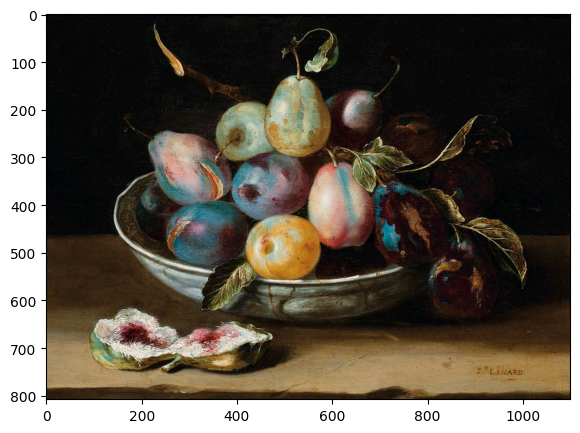

In [44]:
plt.figure(figsize=(10, 5))
image_path = qa_list[0]['image_path']   
image = Image.open(osp.join(benchmark_mme_path, image_path))
plt.imshow(image)
plt.show()